<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-2-public/blob/adding_C3/C3/W1/ungraded_labs/C3_W1_Lab_2_horses_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horses or Humans

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
!pip install tensorflow_addons

ERROR: Could not find a version that satisfies the requirement tensorflow_addons (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow_addons


In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
# import tensorflow_addons as tfa

data = tfds.load('horses_or_humans', split='train', as_supervised=True)
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Sanju\tensorflow_datasets\horses_or_humans\incomplete.ZT9QIT_3.0.0\horses_or_humans-train.t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Sanju\tensorflow_datasets\horses_or_humans\incomplete.ZT9QIT_3.0.0\horses_or_humans-test.tf…

Dataset horses_or_humans downloaded and prepared to C:\Users\Sanju\tensorflow_datasets\horses_or_humans\3.0.0. Subsequent calls will reuse this data.


In [7]:
train_batches = data.shuffle(100).batch(32)
validation_batches = val_data.batch(32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                                      input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Sanju\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(train_batches, epochs=10, validation_data=validation_batches, validation_steps=1)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 491ms/step - accuracy: 0.6976 - loss: 9.8825 - val_accuracy: 0.9062 - val_loss: 0.4882
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 448ms/step - accuracy: 0.9715 - loss: 0.0685 - val_accuracy: 0.7500 - val_loss: 3.1011
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.9953 - loss: 0.0177 - val_accuracy: 0.8125 - val_loss: 3.7262
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 478ms/step - accuracy: 0.9996 - loss: 0.0053 - val_accuracy: 0.8750 - val_loss: 1.9076
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8125 - val_loss: 3.4908
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 1.0000 - loss: 1.3477e-04 - val_accuracy: 0.8438 - val_loss: 1.6582
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 1.0000 - loss: 6.7583e-05 - val_accuracy: 0.6250 - val_loss: 11.6299
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 1.0000 - loss: 4.5246e-

c:\Users\Sanju\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 1.0000 - loss: 3.2977e-05 - val_accuracy: 0.7500 - val_loss: 2.8664


In [9]:
iterator = data.take(10)

Label: 0


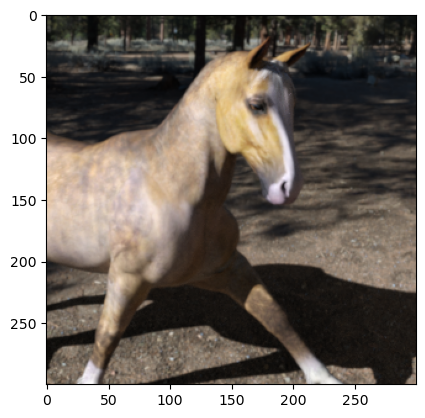

Label: 0


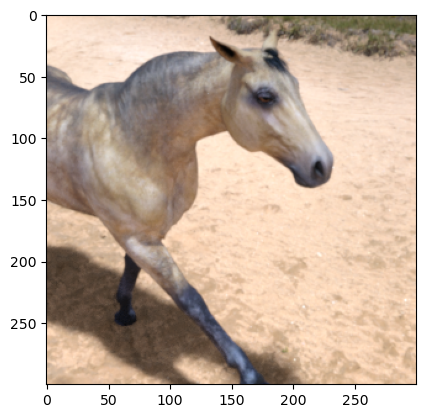

Label: 0


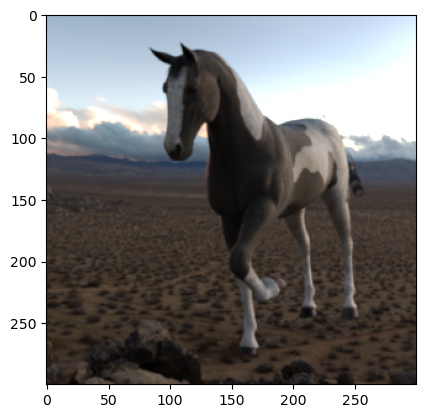

Label: 0


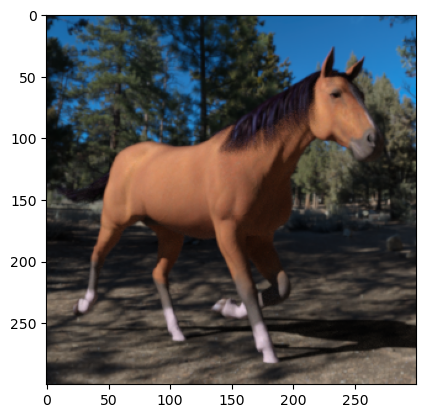

Label: 0


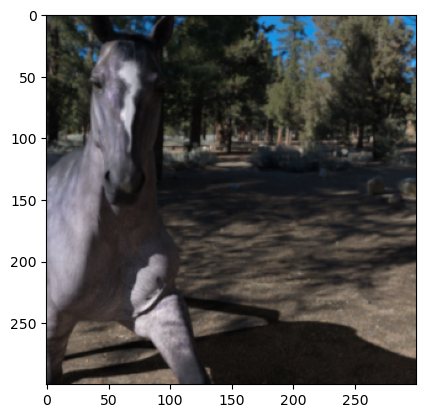

Label: 0


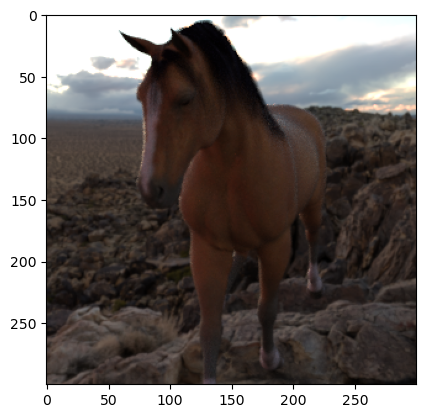

Label: 0


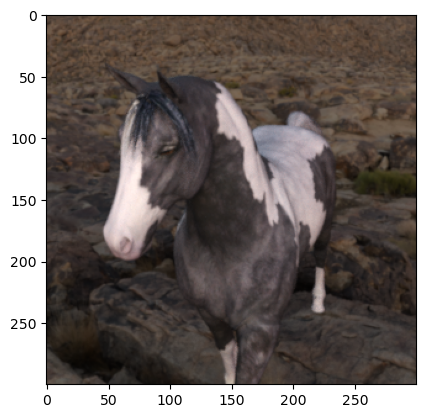

Label: 1


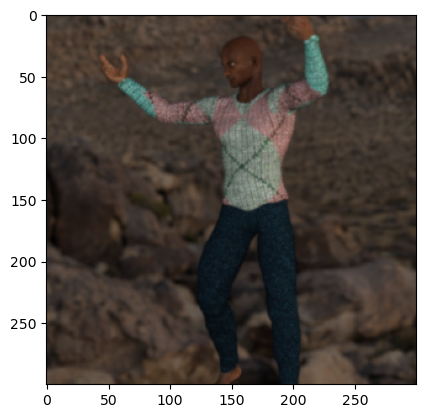

Label: 1


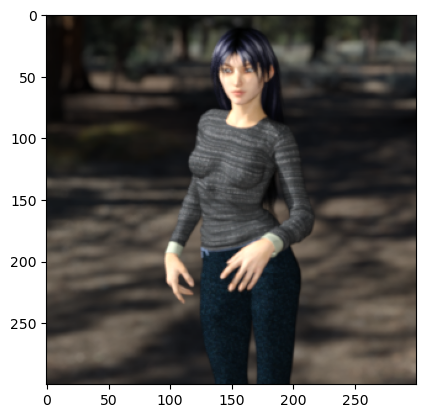

Label: 1


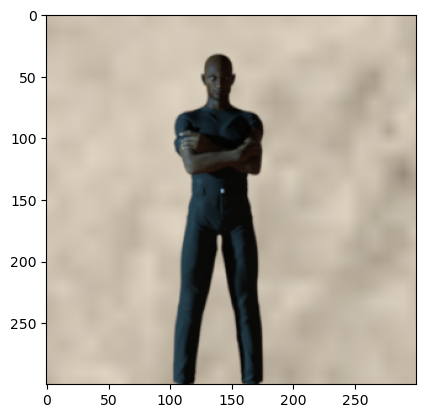

In [20]:
from matplotlib import pyplot as plt
for d in iterator:
    image = d[0].numpy()
    label = d[1].numpy()
    
    print("Label: {}".format(label))
    plt.imshow(image)
    plt.show()